# EDA (come back when you know about decision tree for randomised cross validation)

In [112]:
import pandas as pd
from sklearn.datasets import load_boston

In [113]:
boston = load_boston()

In [114]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [115]:
print(boston.data.shape)

(506, 13)


In [116]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [117]:
import pandas as pd
boston_df = pd.DataFrame(boston.data, columns= boston.feature_names).reset_index()
boston_df.head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [118]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
index      506 non-null int64
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


**RM** and **ZM** shows postive linear correlation with Median Value, whereas **LSTAT** and **PTRATIO** show strong negative correlation with Median Value

In [119]:
boston_target = pd.DataFrame(boston.target).reset_index()
boston_target.columns = ["index","Median Value"]
boston_full = pd.merge(left=boston_df, right=boston_target,  on="index")

corr_boston = boston_full.corr()
corr_boston["Median Value"].sort_values(ascending=False)

Median Value    1.000000
RM              0.695360
ZN              0.360445
B               0.333461
DIS             0.249929
CHAS            0.175260
index          -0.226604
AGE            -0.376955
RAD            -0.381626
CRIM           -0.385832
NOX            -0.427321
TAX            -0.468536
INDUS          -0.483725
PTRATIO        -0.507787
LSTAT          -0.737663
Name: Median Value, dtype: float64

In [120]:
boston_full.head()

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Median Value
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


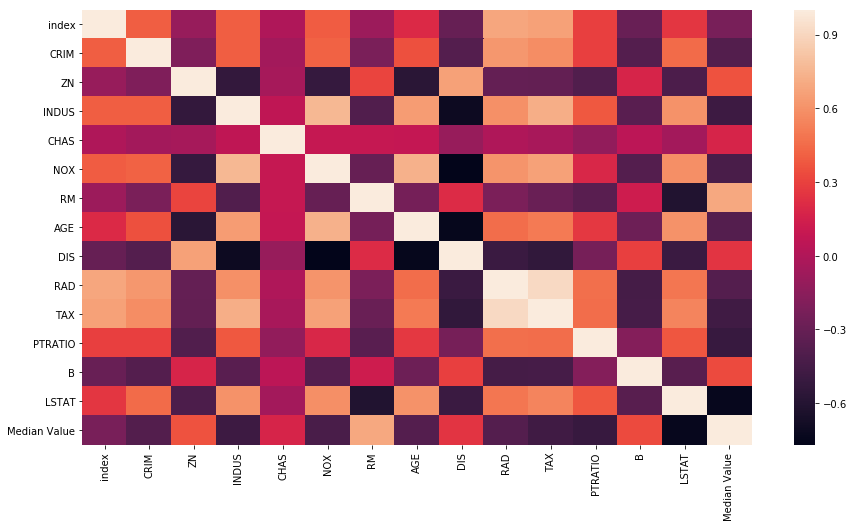

In [121]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.heatmap(corr_boston)
plt.show()

# Prepeartion of Data

In [122]:
from sklearn.model_selection import train_test_split
boston_full.drop("index", axis=1, inplace=True)
boston_train, boston_test = train_test_split(boston_full, test_size=0.2)
boston_train.shape

(404, 14)

# Trying Models

## Linear Regression

In [123]:
from sklearn.linear_model import LinearRegression

X = boston_train.drop("Median Value", axis=1)
y = boston_train["Median Value"]

lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X,y)

some_data = boston_full.drop("Median Value", axis=1).iloc[:5]
some_labels = boston_full["Median Value"].iloc[:5]

predictions_reg = lin_reg.predict(some_data)

from sklearn.metrics import mean_squared_error
import numpy as np

mse_reg = mean_squared_error(some_labels, predictions_reg) # Cost function (Lower is better)
rmse_reg = np.sqrt(mse_reg)
print(rmse_reg)

5.800143313705474


In [124]:
#KFold cross validation

from sklearn.model_selection import cross_val_score

scores_reg = cross_val_score(lin_reg, X, y, scoring="neg_mean_squared_error", cv=10) #negative mean squared error is a 
                                                                                 #utility function (greater is better)
rmse_scores_reg = np.sqrt(-scores_reg)
print(rmse_scores_reg)
print("MEAN: {}".format(rmse_scores_reg.mean()))
print("STD: {}".format(rmse_scores_reg.std()))

[4.35490409 8.2313575  5.83713556 3.61312591 6.26297609 5.56486291
 3.35513073 3.43944798 4.42362423 4.20534789]
MEAN: 4.928791288920098
STD: 1.4645854738041495


## Decision Tree ( Best Fit)

In [125]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree = tree.fit(X, y)

predictions_tree = tree.predict(some_data)

mse_tree = mean_squared_error(some_labels, predictions_tree)
rmse_tree = np.sqrt(mse_tree)
print(rmse_tree)

2.1019038988498018


In [126]:
#KFold cross validation

from sklearn.model_selection import cross_val_score

scores_tree = cross_val_score(tree, X, y, scoring="neg_mean_squared_error", cv=10)

rmse_scores_tree = np.sqrt(-scores_tree)
print(rmse_scores_tree)
print("MEAN: {}".format(rmse_scores_tree.mean()))
print("STD: {}".format(rmse_scores_tree.std()))

[3.94121437 8.85195307 4.36700489 4.76511715 4.41112231 6.00866042
 3.2394444  3.81021653 4.87534614 3.83975911]
MEAN: 4.810983838180977
STD: 1.526373550635135


## Support Vector Regression

In [127]:
from sklearn.svm import SVR

svr = SVR()
svr = svr.fit(X,y)

predictions_svr = svr.predict(some_data)

mse_svr = mean_squared_error(some_labels, predictions_svr)
rmse_svr = np.sqrt(mse_svr)
print(rmse_svr)

9.713988462362204


In [128]:
#KFold cross validation

from sklearn.model_selection import cross_val_score

scores_svr = cross_val_score(svr, X, y, scoring="neg_mean_squared_error", cv=10)

rmse_scores_svr = np.sqrt(-scores_svr)
print(rmse_scores_svr)
print("MEAN: {}".format(rmse_scores_svr.mean()))
print("STD: {}".format(rmse_scores_svr.std()))

[ 7.82241447 10.95226615 11.52344582  8.5593041  10.70365493 10.25920084
  7.10645114  7.00227343  8.83879575  7.89522075]
MEAN: 9.06630273730369
STD: 1.5819946762450423


## Random Forest Regression (2nd Best Fit) (Results vary alot)

In [129]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest = forest.fit(X, y)

predictions_forest = forest.predict(some_data)

mse_forest = mean_squared_error(some_labels, predictions_forest)
rmse_forest = np.sqrt(mse_forest)
print(rmse_forest)

1.3396716015501704


In [130]:
#KFold cross validation

from sklearn.model_selection import cross_val_score

scores_forest = cross_val_score(forest, X, y, scoring="neg_mean_squared_error", cv=10)

rmse_scores_forest = np.sqrt(-scores_forest)
print(rmse_scores_forest)
print("MEAN: {}".format(rmse_scores_forest.mean()))
print("STD: {}".format(rmse_scores_forest.std()))

[2.84050622 8.20415362 3.28017623 3.39033094 3.58565928 3.56495582
 2.83823272 3.08299449 3.11152575 2.95310091]
MEAN: 3.685163599309462
STD: 1.5282305015398454


# Pickling two best models, hyperparameters, training data, training labels, predicitons, scores

In [131]:
#This function pickles the ML models (Could've been done using classes)
def pickler(name, model, predictions, training_data, training_label=None, cross_val_score=None, **kwargs):
    
    #Making dicitonary
    import numpy as np
    pickle_dict = {}
    pickle_name = name+".pickle"
    pickle_dict["ML Model"] = model
    pickle_dict["Predictions"] = np.array(predictions)
    pickle_dict["Training Data"] = np.array(training_data)
    pickle_dict["Training Labels"] = np.array(training_label)
    for key, value in kwargs.items():
        pickle_dict[key] = value
    
    #Pickling the dictionary
    from sklearn.externals import joblib
    joblib.dump(pickle_dict, pickle_name)

pickler("random-forest", forest, predictions_forest, X, y, scores_forest, rmse_scores = rmse_scores_forest, 
       rmse_mean = rmse_scores_forest.mean(),rmse_std = rmse_scores_forest.std() ) 
pickler("decision-tree(best)", tree, predictions_tree, X, y, scores_tree, rmse_scores = rmse_scores_tree, 
       rmse_mean = rmse_scores_tree.mean(),rmse_std = rmse_scores_tree.std() ) 

In [132]:
joblib.load("decision-tree(best).pickle")

{'ML Model': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
 'Predictions': array([28.7, 21.6, 34.7, 33.4, 36.2]),
 'Training Data': array([[8.20058e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         3.50000e+00, 1.69400e+01],
        [4.81213e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         2.55230e+02, 1.64200e+01],
        [6.46600e-02, 7.00000e+01, 2.24000e+00, ..., 1.48000e+01,
         3.68240e+02, 4.97000e+00],
        ...,
        [6.80117e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         3.96900e+02, 1.47000e+01],
        [9.25200e-02, 3.00000e+01, 4.93000e+00, ..., 1.66000e+01,
         3.83780e+02, 7.37000e+00],
        [7.84200e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        

# Fine Tuning Model

### Grid Search

In [133]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(X, y)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [134]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [135]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [136]:
# To get complete result sheet
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.61990212012765 {'max_features': 2, 'n_estimators': 3}
4.375746725524753 {'max_features': 2, 'n_estimators': 10}
3.830480428732993 {'max_features': 2, 'n_estimators': 30}
4.550589306485879 {'max_features': 4, 'n_estimators': 3}
4.0135939488367045 {'max_features': 4, 'n_estimators': 10}
3.8393140172708358 {'max_features': 4, 'n_estimators': 30}
4.118482449855648 {'max_features': 6, 'n_estimators': 3}
4.071182534316383 {'max_features': 6, 'n_estimators': 10}
3.707872704732385 {'max_features': 6, 'n_estimators': 30}
4.04886645642434 {'max_features': 8, 'n_estimators': 3}
4.031777026337023 {'max_features': 8, 'n_estimators': 10}
3.7555862352363887 {'max_features': 8, 'n_estimators': 30}
4.37240383445184 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
4.17462983609647 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.3793994067584645 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
4.018747341898941 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

### Random Search
The grid search approach is fine when you are exploring relatively few combinations, like in the previous
example, but when the hyperparameter search space is large, it is often preferable to use
RandomizedSearchCV instead. This class can be used in much the same way as the GridSearchCV class,
but instead of trying out all possible combinations, it evaluates a given number of random combinations
by selecting a random value for each hyperparameter at every iteration. This approach has two main
benefits:
If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000
different values for each hyperparameter (instead of just a few values per hyperparameter with the
grid search approach).
You have more control over the computing budget you want to allocate to hyperparameter search,
simply by setting the number of iterations.

#### Feature importance

In [137]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.0579199 , 0.00462452, 0.04606345, 0.00473501, 0.04639854,
       0.38385281, 0.01904996, 0.08084146, 0.00434111, 0.02487069,
       0.02504257, 0.01965111, 0.28260886])

In [138]:
sorted(zip(feature_importances, boston.feature_names), reverse=True) 

[(0.3838528103717681, 'RM'),
 (0.28260885745347186, 'LSTAT'),
 (0.08084146405888432, 'DIS'),
 (0.05791989797371668, 'CRIM'),
 (0.04639854185003865, 'NOX'),
 (0.04606345199294141, 'INDUS'),
 (0.0250425693562356, 'PTRATIO'),
 (0.024870692314161513, 'TAX'),
 (0.019651111181564058, 'B'),
 (0.019049963621535975, 'AGE'),
 (0.004735012195152752, 'CHAS'),
 (0.004624519325760035, 'ZN'),
 (0.004341108304768961, 'RAD')]

# Testing on test set (Needs Fine Tuning)

In [143]:
test_data = boston_test.drop("Median Value", axis=1)
test_labels = boston_test["Median Value"]

test_predictions = tree.predict(test_data)

final_mse = mean_squared_error(test_labels, test_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

5.567121620483507